In [6]:
import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

<h1>Importing the ailuropoda_melanoleuca(Giant Pandas) dataset</h1>

In [7]:
#Importing the dataset for Giant Pandas
giantp = pd.read_csv('Compara.95.protein_default.homologies.tsv.gz', compression='gzip', header=0, sep='\t', quotechar='"')
giantp.head(10)

,gene_stable_id,protein_stable_id,species,identity,homology_type,homology_gene_stable_id,homology_protein_stable_id,homology_species,homology_identity,dn,ds,goc_score,wga_coverage
0,ENSAMEG00000006897,ENSAMEP00000007304,ailuropoda_melanoleuca,76.5861,ortholog_one2one,ENSUAMG00000017417,ENSUAMP00000022199,ursus_americanus,80.8612,0.1319,0.2454,0.0,NaN
1,ENSAMEG00000006897,ENSAMEP00000007304,ailuropoda_melanoleuca,82.1752,ortholog_one2one,ENSUMAG00000015760,ENSUMAP00000021571,ursus_maritimus,85.9400,0.0991,0.1946,50.0,NaN
2,ENSAMEG00000006897,ENSAMEP00000007304,ailuropoda_melanoleuca,89.5770,ortholog_one2one,ENSCAFG00020003745,ENSCAFP00020004564,canis_lupus_dingo,90.3963,0.0557,0.1728,50.0,NaN
3,ENSAMEG00000006897,ENSAMEP00000007304,ailuropoda_melanoleuca,92.1450,ortholog_one2one,ENSMPUG00000012749,ENSMPUP00000012654,mustela_putorius_furo,92.1450,0.0391,0.1275,50.0,NaN
4,ENSAMEG00000006897,ENSAMEP00000007304,ailuropoda_melanoleuca,92.2961,ortholog_one2one,ENSCAFG00000013439,ENSCAFP00000019808,canis_familiaris,92.2961,0.0395,0.1545,50.0,100.0
5,ENSAMEG00000006897,ENSAMEP00000007304,ailuropoda_melanoleuca,86.2538,ortholog_one2one,ENSVVUG00000029081,ENSVVUP00000040826,vulpes_vulpes,92.6948,0.0395,0.1585,50.0,NaN
6,ENSAMEG00000006897,ENSAMEP00000007304,ailuropoda_melanoleuca,90.6344,ortholog_one2one,ENSFCAG00000001331,ENSFCAP00000001237,felis_catus,90.7716,0.0453,0.2016,50.0,NaN
7,ENSAMEG00000006897,ENSAMEP00000007304,ailuropoda_melanoleuca,89.4260,ortholog_one2one,ENSPPRG00000002585,ENSPPRP00000007413,panthera_pardus,90.5199,0.0464,0.2108,50.0,NaN
8,ENSAMEG00000006897,ENSAMEP00000007304,ailuropoda_melanoleuca,91.0876,ortholog_one2one,ENSPTIG00000017762,ENSPTIP00000020218,panthera_tigris_altaica,90.9502,0.0443,0.2037,50.0,NaN
9,ENSAMEG00000006897,ENSAMEP00000007304,ailuropoda_melanoleuca,86.1027,ortholog_one2one,ENSPVAG00000017245,ENSPVAP00000016267,pteropus_vampyrus,85.8434,0.0770,0.2699,25.0,NaN


<h1>Data Preprocessing</h1>

In [8]:
X = giantp.copy()
X = X.drop(['identity','homology_identity','dn','ds','wga_coverage'],axis=1)

# Label Encoding
for c in giantp.columns[giantp.dtypes == 'object']:
    X[c] = X[c].factorize()[0]
# fill NANs
X = X.fillna(-999)

X['l_goc'] = X['goc_score'].map(lambda x: x>10 )
y = X.l_goc
X = X.drop('l_goc',axis=1)
X.head(10)

,gene_stable_id,protein_stable_id,species,homology_type,homology_gene_stable_id,homology_protein_stable_id,homology_species,goc_score
0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,1,1,1,50.0
2,0,0,0,0,2,2,2,50.0
3,0,0,0,0,3,3,3,50.0
4,0,0,0,0,4,4,4,50.0
5,0,0,0,0,5,5,5,50.0
6,0,0,0,0,6,6,6,50.0
7,0,0,0,0,7,7,7,50.0
8,0,0,0,0,8,8,8,50.0
9,0,0,0,0,9,9,9,25.0


<h1>Fitting the data</h1>

In [9]:
# Fitting the classifier with the dataset
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<h1>Visualization</h1>

([<matplotlib.axis.XTick at 0x2b28f4547b8>,
 <a list of 8 Text xticklabel objects>)

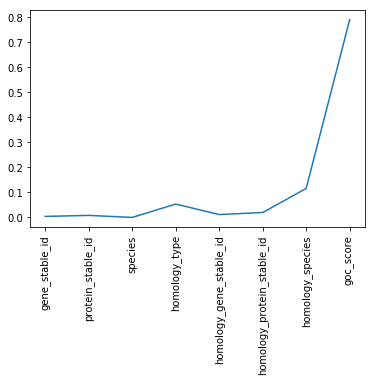

In [11]:
#Visualizing the data
import matplotlib.pyplot as plt
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(X.shape[1]),X.columns.tolist(),rotation=90)